<a href="https://colab.research.google.com/github/alexanderVarg/TRABAJO_FINAL/blob/main/02_Model_conv1d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PHYSICAL, CHEMICAL AND BIOLOGICAL VARIABLES FOR WATER QUALITY

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras import layers
from matplotlib import pyplot as plt

In [ ]:
# read data
df = pd.read_csv("/content/waterQuality_scaled.csv")
df.shape

(7996, 21)

In [ ]:
# create dataset without response column
df_x=df.iloc[:,0:20]
# create dataset with only response column (is_safe)
df_y = df.iloc[:,-1]


# Variable selection
All variables were used to train the model 

In [ ]:
from sklearn.model_selection import train_test_split
df_x_train, df_x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=.30)

# the last 100 records of each data set are not evaluated:
y_train = y_train.iloc[:-100]
y_test= y_test.iloc[:-100]
# Show the quantities of both classes: 0 and 1
print ("\ndistribution of train classes")
print (pd.Series(y_train).value_counts())
print ("\ndistribution of test classes")
print (pd.Series(y_test).value_counts())


distribution of train classes
0.0    4874
1.0     623
Name: is_safe, dtype: int64

distribution of test classes
0.0    2034
1.0     265
Name: is_safe, dtype: int64


# deep learning model

**Generate training sequences**

The data is in the form (n_samples, n_features) and must be transformed to the form (n_samples, n_times, n_features) with a window n_times equal to 100 samples.

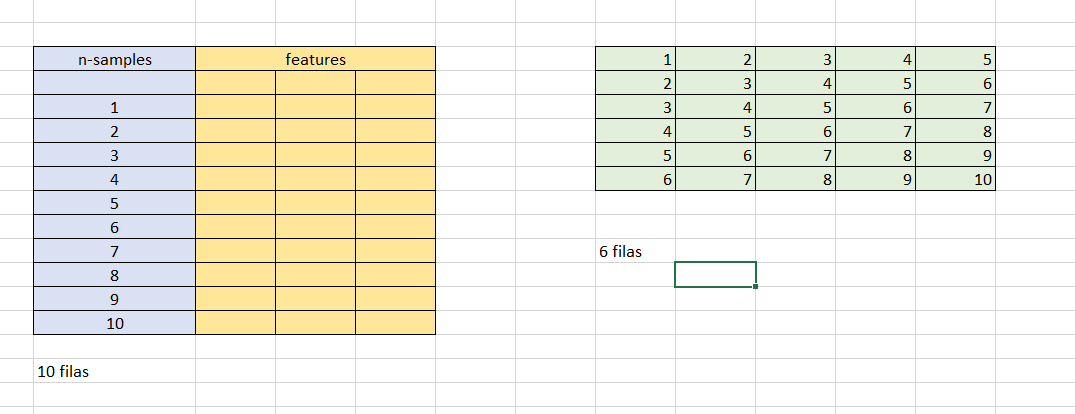

In [ ]:
from IPython.display import Image
Image('/content/Transformar_datos.PNG', width=600, height=300)

In [ ]:
# Generate training sequence
def create_sequences(values, n_samples, n_times, n_features):
    output = np.zeros( (n_samples-n_times, n_times, n_features) )
    for j in range(1, n_features):
        features = []
        for i in range(n_samples - n_times):
            output[i,:,j]=values[i : (i + n_times),j]
    return output

In [ ]:
# Model CONV1D
def model1(X):
    import tensorflow as tf
    from numpy import array
    from keras.models import Sequential
    from keras.layers import Dense
    from keras.layers import Flatten
    from keras.layers.convolutional import Conv1D
    from keras.layers.convolutional import MaxPooling1D
    model = keras.Sequential(
        [ 
            layers.Conv1D( filters=32, kernel_size=3, padding="same", strides=1, activation="relu", input_shape=(x_train.shape[1], x_train.shape[2])),
            layers.Dropout(rate=0.2), 
            layers.Conv1D( filters=16, kernel_size=3, padding="same", strides=1, activation="relu" ),
            layers.Dropout(rate=0.2), 
            layers.Conv1D( filters=8, kernel_size=3, padding="same", strides=1, activation="relu" ),
            layers.Dropout(rate=0.2), 
            layers.Flatten(),
            layers.Dense( 1, activation= 'sigmoid')  
        ]
    )
    return model
    

In [ ]:
model= model1(x_train)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 100, 32)           1952      
                                                                 
 dropout_3 (Dropout)         (None, 100, 32)           0         
                                                                 
 conv1d_4 (Conv1D)           (None, 100, 16)           1552      
                                                                 
 dropout_4 (Dropout)         (None, 100, 16)           0         
                                                                 
 conv1d_5 (Conv1D)           (None, 100, 8)            392       
                                                                 
 dropout_5 (Dropout)         (None, 100, 8)            0         
                                                                 
 flatten_1 (Flatten)         (None, 800)              

In [ ]:
# Generate x_train sequence so that the model can determine the shape of the input and output
df_training = np.array(df_x_train)
N_SAMPLES= df_training.shape[0] 
N_TIMES = 100 
N_FEATURES = df_training.shape[1]  
x_train= create_sequences(df_training, N_SAMPLES, N_TIMES, N_FEATURES)
x_train = x_train.astype(np.float32)
x_train.shape

(5497, 100, 20)

In [ ]:
# Generate x_test sequence 
df_testing = np.array(df_x_test)
N_SAMPLES= df_testing.shape[0] 
N_TIMES = 100 
N_FEATURES = df_testing.shape[1]  
x_test= create_sequences(df_testing, N_SAMPLES, N_TIMES, N_FEATURES)
x_test = x_test.astype(np.float32)
x_test.shape

(2299, 100, 20)

**Compile the model**

In [ ]:
model= model1(x_train)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-6), loss="mse", metrics=['accuracy'])


In [ ]:
#train the model

In [ ]:
history = model.fit(
            x_train,
            y_train,
            epochs = 100,
            batch_size=100,
            validation_split=0.2,
            callbacks=[keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")]
        ) 

Epoch 1/100
44/44 [==============================] - 2s 31ms/step - loss: 0.2812 - accuracy: 0.3907 - val_loss: 0.2742 - val_accuracy: 0.3055
Epoch 2/100
44/44 [==============================] - 1s 28ms/step - loss: 0.2764 - accuracy: 0.4076 - val_loss: 0.2722 - val_accuracy: 0.3164
Epoch 3/100
44/44 [==============================] - 1s 28ms/step - loss: 0.2773 - accuracy: 0.4005 - val_loss: 0.2703 - val_accuracy: 0.3282
Epoch 4/100
44/44 [==============================] - 1s 28ms/step - loss: 0.2730 - accuracy: 0.4151 - val_loss: 0.2685 - val_accuracy: 0.3409
Epoch 5/100
44/44 [==============================] - 1s 30ms/step - loss: 0.2710 - accuracy: 0.4321 - val_loss: 0.2666 - val_accuracy: 0.3609
Epoch 6/100
44/44 [==============================] - 1s 28ms/step - loss: 0.2693 - accuracy: 0.4387 - val_loss: 0.2648 - val_accuracy: 0.3691
Epoch 7/100
44/44 [==============================] - 1s 29ms/step - loss: 0.2687 - accuracy: 0.4414 - val_loss: 0.2630 - val_accuracy: 0.3827
Epoch 

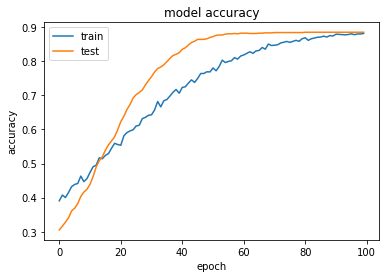

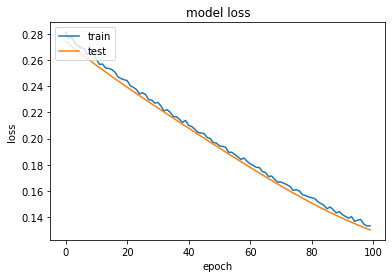

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
test_preds = model.predict(x_test).argmax(axis=1)
confusion = tf.math.confusion_matrix(labels=y_test, predictions=test_preds, num_classes=2)
print(confusion)

tf.Tensor(
[[2034    0]
 [ 265    0]], shape=(2, 2), dtype=int32)
